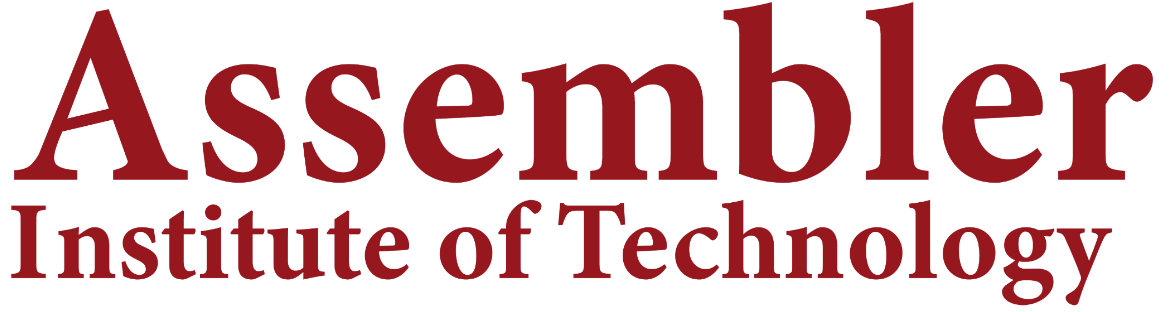

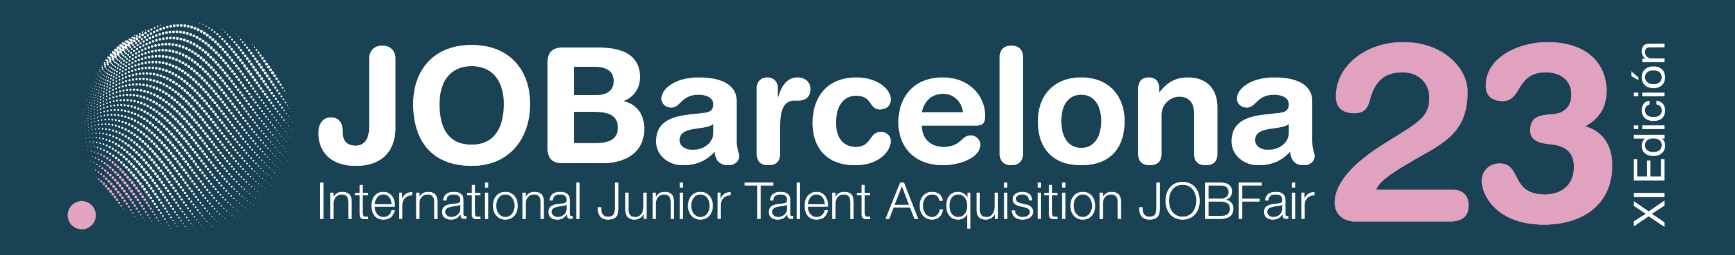

# <font color='#97171e'>**La ciencia de datos aplicada al hundimiento del Titanic**</font>

_Por Francesc Vilaró Antunes Dos Santo, Marco Antonio Hernani Chavez y Luciano Gabbanelli_

<br>

El hundimiento del RMS Titanic es uno de los más famosos de la historia. El 15 de abril de 1912, el Titanic se hundió al impactar con un iceberg, provocando la muerte de 1513 de los 2225 individuos que viajaban. Esta tragedia generó un impacto a nivel mundial y provocó que se mejoraran las regulaciones para los transportes marítimos. Utilizaremos Python para analizar los datos recaudados sobre este acontecimiento.

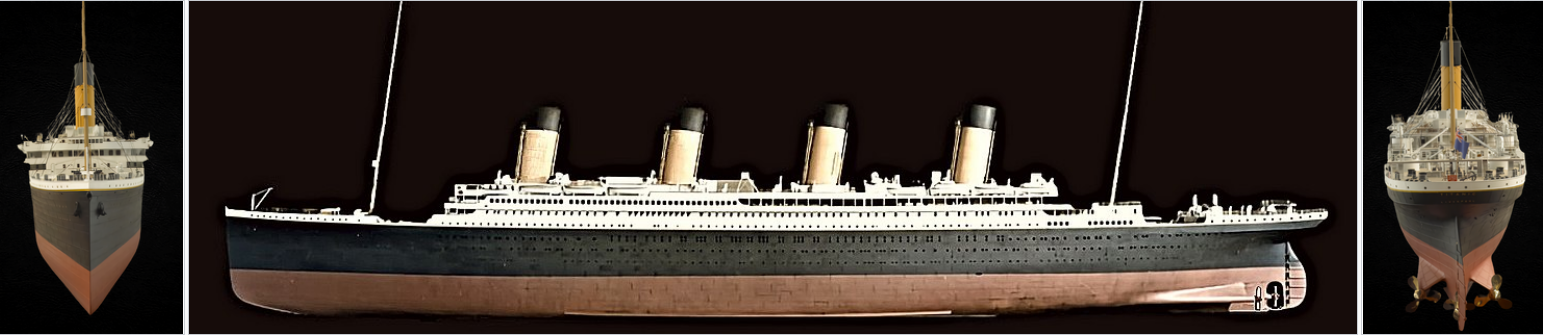

## Índice
1. [Exploración inicial del dataset](#inicial)
2. [¿De qué edades eran las personas que viajaban en el Titanic?](#edades)
3. [¿Hay alguna relación entre la edad y la supervivencia?](#edad_sup)
4. [¿Hay alguna relación entre el género y la supervivencia?](#genero_sup)
5. [¿Hay alguna relación entre la clase y la supervivencia?](#clase_sup)
6. [¡Pensemos más preguntas interesantes!](#preguntas)

## 1. Exploración inicial del dataset <a class="anchor" id="inicial"></a>


Data Dictionary

    'Survived': 0 = No, 1 = Yes
    'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    'Sex': Sex
    'Age': Age in years
    'SibSp': # of siblings / spouses aboard the Titanic
    'Parch': # of parents / children aboard the Titanic
    'Ticket': Ticket number
    'Fare': Passenger fare
    'Cabin': Cabin number
    'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton



In [1]:
# Importamos pandas 
import pandas as pd

# Leemos el archivo csv que contiene los datos
df = pd.read_csv('titanic.csv')

In [2]:
# Chequeamos los nombres de las columnas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# Vemos las primeras cinco filas del dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Calculamos datos estadísticos relevantes sobre las columnas numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Valores faltantes

In [5]:
# Chequeamos en qué columnas hay datos faltantes y cuántos
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Obteniendo [cantidad de datos completos, cantidad de datos faltantes]
df_data = dict()
num_rows = int(df.shape[0])
for col in ['Age', 'Cabin', 'Embarked']:
  missing_values = int(df[col].isna().sum())
  df_data[col]= [num_rows-missing_values, missing_values]

print(df_data)

{'Age': [714, 177], 'Cabin': [204, 687], 'Embarked': [889, 2]}


Veamos el porcentaje de datos completos y faltantes que hay en Age, Cabin y Embarked.

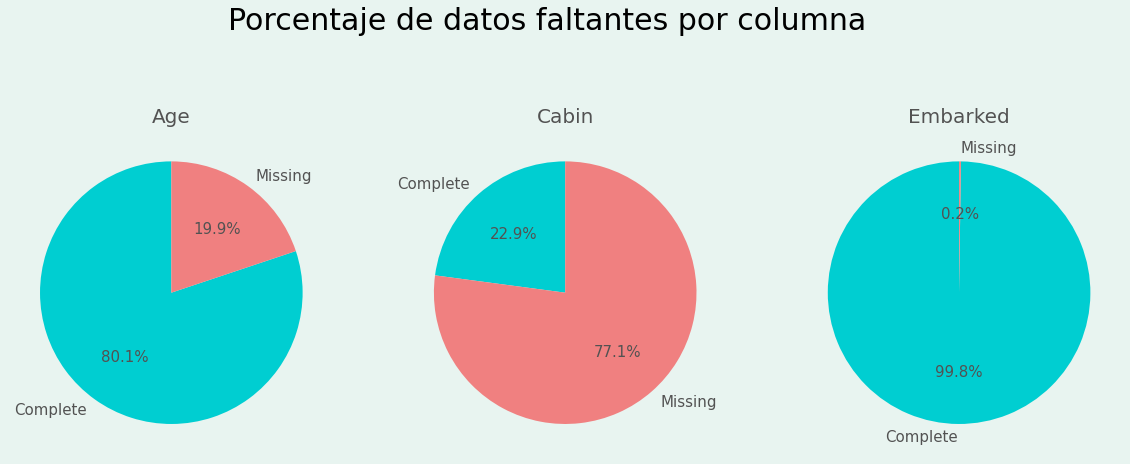

In [7]:
# importamos matplotlib
import matplotlib.pyplot as plt

# elegimos colores
font_color = '#525252'
colors = ["darkturquoise", "lightcoral"]

# creamos una figura con una fila y tres columnas de gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 10), facecolor='#e8f4f0')

# creamos un gráfico para cada columna
for i, col in enumerate(df_data):
  axes[i].pie(df_data[col], 
           labels=['Complete', 'Missing'], 
           startangle=90, 
           colors=colors, 
           textprops={'color':font_color, 'fontsize': 15},
           autopct='%1.1f%%')
  axes[i].set_title(col, fontsize=20, color=font_color)

title = fig.suptitle('Porcentaje de datos faltantes por columna', y=.9,
                     fontsize=30, color='black')

plt.show()

## 2. ¿De qué edades eran las personas que viajaban en el Titanic? <a class="anchor" id="edades"></a>

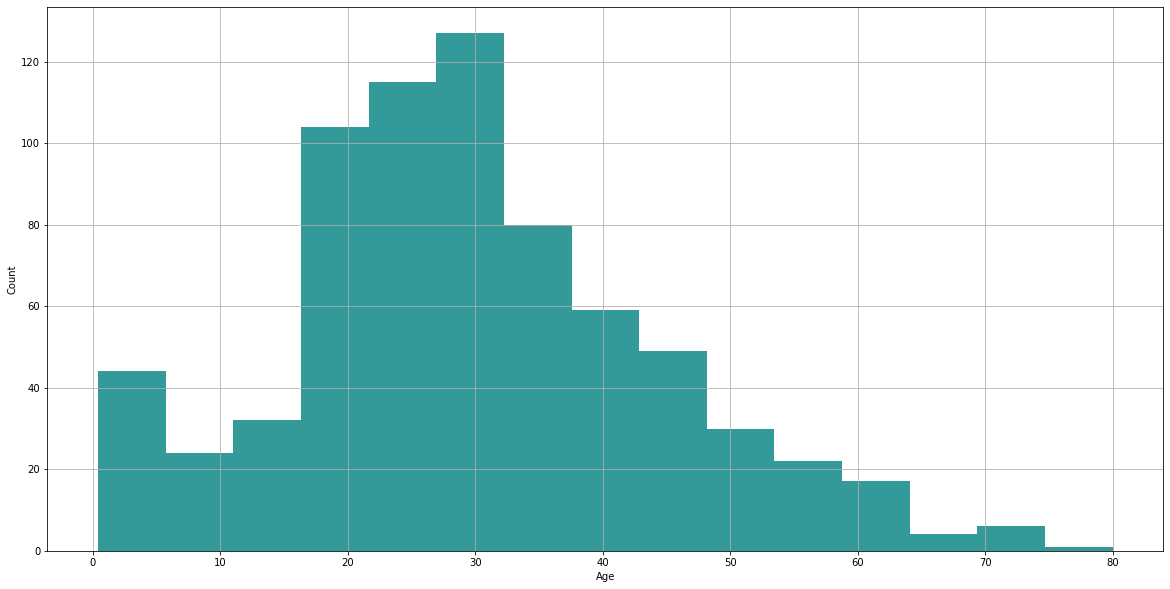

In [8]:
ax = df["Age"].hist(bins=15, color='teal', alpha=0.8, figsize=(20,10))
ax.set(xlabel='Age', ylabel='Count')
plt.show()

Como la distribución de los datos no es simétrica, el valor más representativo va a ser la mediana. ¡Calculemosla!

In [9]:
print('La mediana de las edades es:', df["Age"].median(skipna=True))

La mediana de las edades es: 28.0


## 3. ¿Hay alguna relación entre la edad y la supervivencia? <a class="anchor" id="edad_sup"></a>

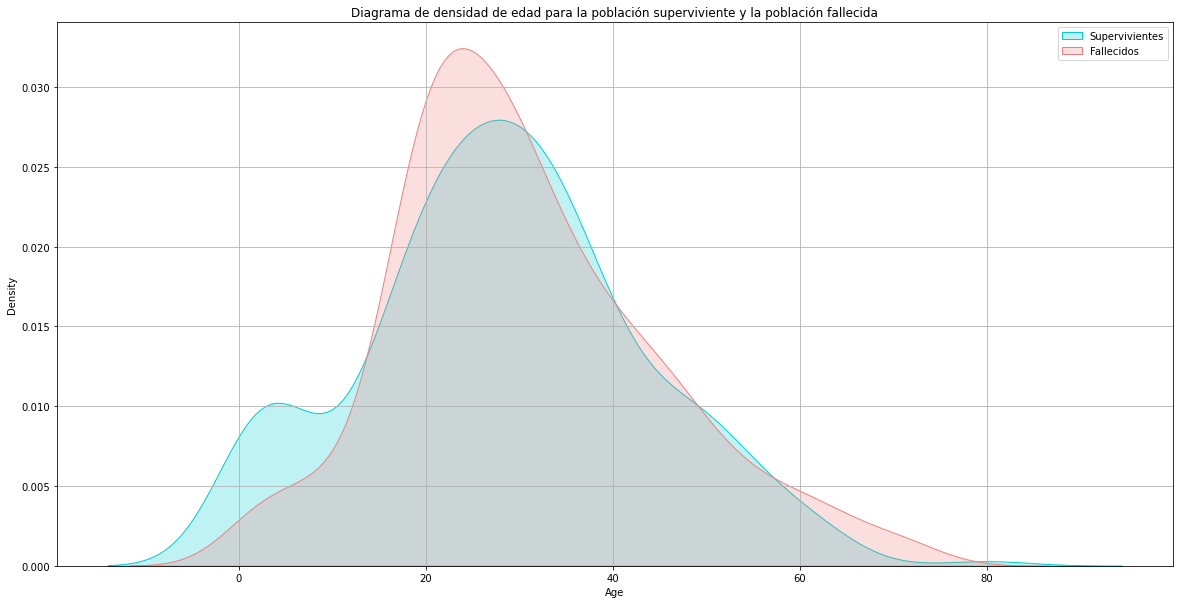

In [10]:
# importamos seaborn
import seaborn as sns

plt.figure(figsize=(20,10))
sns.kdeplot(df["Age"][df.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df["Age"][df.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Supervivientes', 'Fallecidos'])
plt.title('Diagrama de densidad de edad para la población superviviente y la población fallecida')
plt.grid()
plt.show()



Podemos notar que hay un pico de supervivencia en las edades de niñes, lo cual evidencia la tendencia a priorizar salvar a les niñes. La clásica frase: "Primero mujeres y niños". ¿Habrá habido una tasa mayor de supervivencia en mujeres?


## 4. ¿Hay alguna relación entre el género y la supervivencia? <a class="anchor" id="genero_sup"></a>

*Disclaimer: Somos conscientes de la existencia de más géneros pero este dataset, lamentablemente, solo distingue entre mujer y varón.*

Veamos primero cuántas personas de cada género hay registradas. 

In [11]:
df.groupby('Sex').count().rename(columns={'Name':'Count'})[['Count']]

,Count
Sex,
female,314
male,577


In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Tenemos 314 mujeres y 577 varones, por lo que nuestros datos no están balanceados. Que nuestros datos no esten balanceados significa que que la cantidad de mujeres y varones que hay no es la misma. Esto nos impide poder comparar directamente los supervivientes/fallecidos de cada genero.

Por ello para poder comparar tendremos que mostrar los porcentajes en vez del conteo.

In [13]:
data_percent = df.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
data_percent

,Sex,Survived,Percent
0,female,1,74.203822
1,female,0,25.796178
2,male,0,81.109185
3,male,1,18.890815


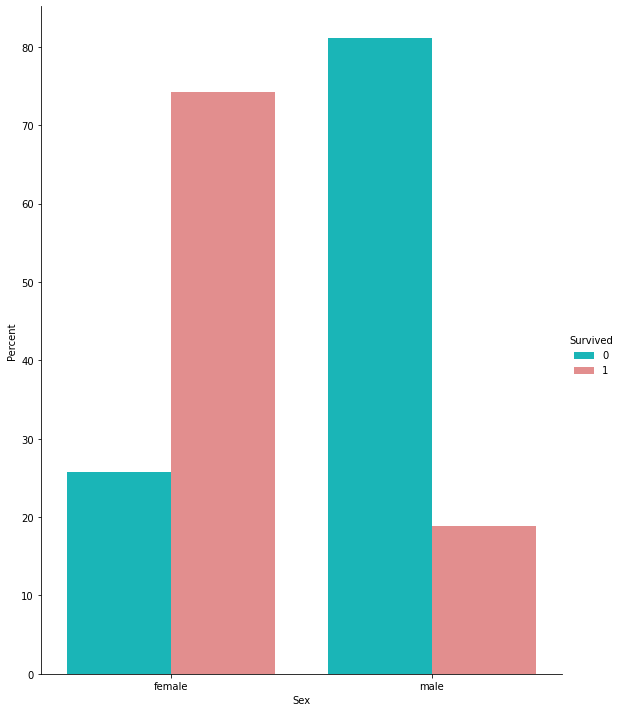

In [14]:
colors = ["darkturquoise", "lightcoral"] 
sns.catplot(x="Sex", y="Percent", hue="Survived", data=data_percent, kind="bar", palette=colors, height=10, aspect=0.8)
plt.show()

Hay un mayor porcentaje de mujeres sobrevivientes que de varones.

## 5. ¿Hay alguna relación entre la clase y la supervivencia? <a class="anchor" id="clase_sup"></a>

Vamos a hacer un procedimiento análogo al de la sección anterior pero ahora analizando `Pclass` en vez de `Sex`.

In [15]:
df.groupby('Pclass').count().rename(columns={'Name':'Count'})[['Count']]

,Count
Pclass,
1,216
2,184
3,491


In [16]:
data_percent = df.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
data_percent

,Pclass,Survived,Percent
0,1,1,62.962963
1,1,0,37.037037
2,2,0,52.717391
3,2,1,47.282609
4,3,0,75.763747
5,3,1,24.236253


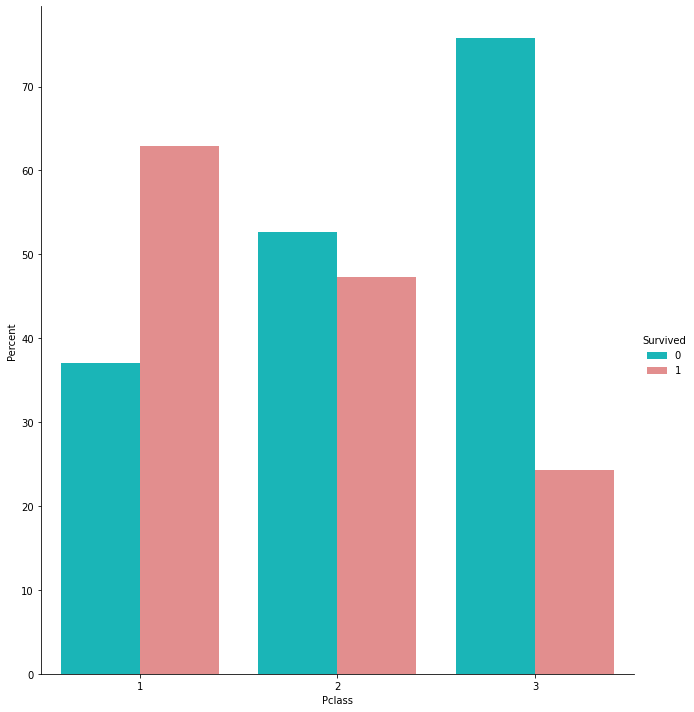

In [17]:
colors = ["darkturquoise", "lightcoral"] 
sns.catplot(x="Pclass", y="Percent", hue="Survived", data=data_percent, kind="bar", palette=colors, height=10, aspect=0.9)
plt.show();

Podemos ver que cuanto más baja es la clase, menor la tasa de supervivencia.

## 6. ¡Pensemos más preguntas interesantes! 😃 <a class="anchor" id="preguntas"></a>

Creemos algunas preguntas más que podríamos hacernos a partir de este dataset y anotemoslas.

* pregunta 1
* pregunta 2
* pregunta 3
* pregunta 4

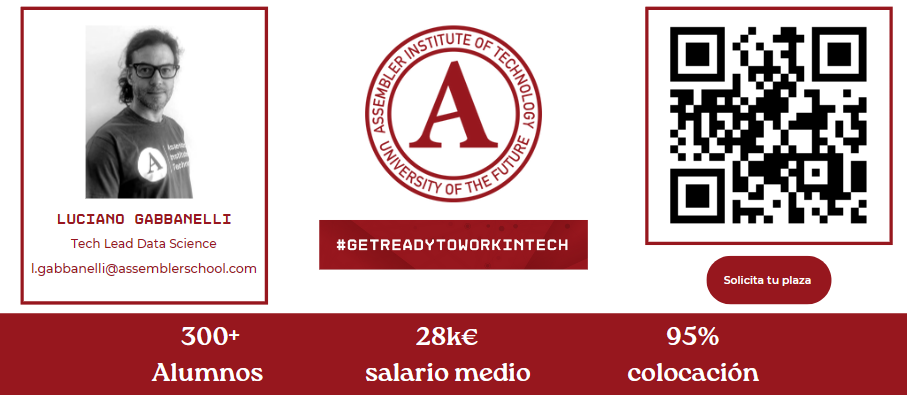

# <p style="text-align: center;"><font color='#97171e'>**¡Muchas gracias por asistir!**</font>    🚢</p>
